In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Estate_valuation.csv

In [2]:
estate_df = pd.read_csv('../data/estate_valuation.csv')

In [3]:
estate_df = estate_df.drop('No', axis=1)

In [4]:
estate_df.head(5)

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

In [5]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


Посмотрим как связаны между собой различные признаки.

In [6]:
sns_plot = sns.pairplot(estate_df)

Также можно заметить, что признаки "X1 transaction date" и "X4 number of convenience stores" принимают небольшое кол-во значений (дискретные). Линейных зависимостей нигде не наблюдается.

На следующем графике присутсвует выброс (ценник слишком дорогих домов). Распределение близко к нормальному.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

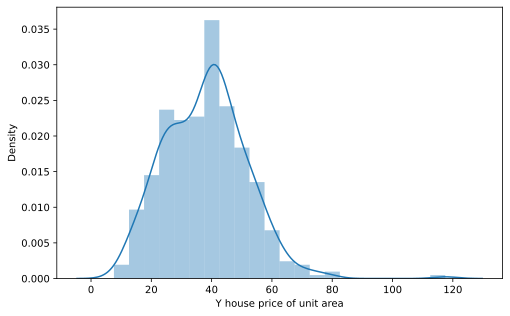

In [7]:
sns.distplot(estate_df["Y house price of unit area"])

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

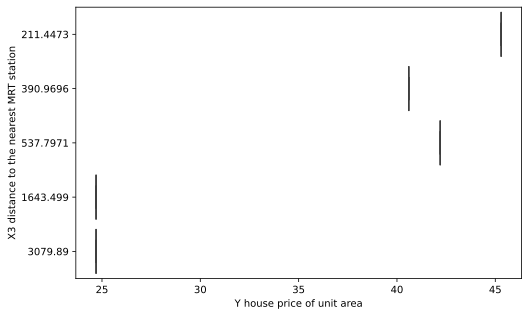

In [8]:
mins_distance = estate_df["X3 distance to the nearest MRT station"].value_counts().sort_values(ascending = False).tail(5).index.values
sns.boxplot(y="X3 distance to the nearest MRT station", x="Y house price of unit area", data=estate_df[estate_df["X3 distance to the nearest MRT station"].isin(mins_distance)], orient="h")

Такой график получился, из за того, что признак "X3 distance to the nearest MRT station" не категориальный и только по одному разу принимались данные минимальные расстояния до станций метро.